In [3]:
# The Question
## Explain the question you would like to answer, and why it is interesting.
# Describe the data that you would like to gather, the analysis on the data that you would like to perform, and why it would answer the question

# My question is wheter the references to SCOTUS increase on the days that the court regularly releases their rulings or whether the references only increase when a high-priority case comes around. #Relatedly, will the sentiment toward SCOTUS be skewed to one side or another as a trend? 
# Personally, this question came to mind becuase my husband loves folowing the Court and even has a podcast with two lawyers about their current cases and recent decisions. He also reads famous court cases/quotes before falling asleep. So I've been innendated with SCOTUS content since getting married. :) For broad application, the answer to these questions will show an interesting commentary about the opinions in/state of our democrocy - reguardless of what the answer is. But that does, like all twitter reserach, assume that people who are intresered in the Court are equally represented by active Twitter users.

# I would like to gather all the tweets from the last 7 days that mentioned SCOTUS then count the number of reference per day. SCOTUS released rullings Monday and Thursday this week, so I will investigate with counts, charts, and (if I can figure it out) an ANOVA to see if there is any notable difference in the number of references. This may actually be an ideal week to test this becuase, according to Jey, the rullings this week were "meh."

In [16]:
import tweepy
import json
from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [17]:
# Make a list to store the results
results = []
for tweet in tweepy.Cursor(api.search, 
                           q='SCOTUS -filter:retweets', # only get the original tweets
                           tweet_mode = 'extended',
                           count=200).items(40000): # Change this to as high as you like, if you have time :)
    results.append(tweet._json)
    print(tweet.user.screen_name + "\t" + str(tweet.created_at) + "\t" + tweet.full_text)

 should worry about the New York legal investigations. A lot. https://t.co/pdWoBnF3lW
RickyRayinGA	2021-05-22 00:53:43	Obama-Appointed Judge Sides with Biden, Rules Private Christian College Must Allow Biological Men to Shower with Women! Fuck that take it to SCOTUS and do it now! Enough of the perverse Communist MSM and their @DNC handlers ⁦@NorahODonnell⁩  https://t.co/7GhiPvWpEB
Correctioneer	2021-05-22 00:53:42	@JasonFyk @clmuseum @scrogham32 That's not how SCOTUS works. Denying cert means they are not affirming or overturning the lower court. The screenshot below is from the denial of cert. I'm sure you have the link yourself. Can you post the screenshot of where it says the lower court ruling is affirmed?

(1/x) https://t.co/x2uNcjvYBV
AlexEuropa2	2021-05-22 00:53:38	@NickyNoxville @ZipinParadise @naomimath @TulsiGabbard @BernieSanders The right to bear arms is not granted by the Constitution, the government, or SCOTUS; it’s a natural, inalienable right. 

It is a right that is i

In [18]:
with open('raw_SCOTUS_tweets.json', 'w') as f:
    json.dump(results, f)

In [19]:
with open('raw_SCOTUS_tweets.json', 'r') as f:
    tweets = json.load(f) #the output itself

In [43]:
import csv
with open('cleaned_SCOTUS_data.csv', 'w', 
          encoding='UTF-8',
          newline='') as fn:
    f = csv.writer(fn)
    f.writerow(['created_at',
                'tweet_text',
                'tweet_length'
               ])
    for tweet in tweets:
        f.writerow([tweet['created_at'], 
                    tweet['full_text'],
                    len(tweet['full_text'])
                   ])

In [ ]:
## Program 3 - Data Analysis

#Here we use pandas to load the data and analyze it. This could include statistical tests. Here, I'm just visualizing the distribution of retweets and the relationship between retweets and length.

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [56]:
df = pd.read_csv('./cleaned_SCOTUS_data.csv')

In [57]:
# Just make sure it looks OK.
df.columns


Index(['created_at', 'tweet_text', 'tweet_length'], dtype='object')

In [ ]:
# Analysis
## Come up with a visualization and/or statistical test that would help to answer your question.
chart of references/tweets per day
bar graph of references/tweets per day
anova to compare group


In [58]:
df.head()

,created_at,tweet_text,tweet_length
0,Sat May 29 18:22:12 +0000 2021,"Stop citing SCOTUS rulings as authoritative, e...",237
1,Sat May 29 18:21:47 +0000 2021,Justice Breyer is an activist’s activist who h...,274
2,Sat May 29 18:21:17 +0000 2021,@brianschatz Just look at SCOTUS and how a han...,184
3,Sat May 29 18:21:06 +0000 2021,@tribelaw If SCOTUS members increase Breyer's ...,210
4,Sat May 29 18:20:40 +0000 2021,"@jasondogwood So, in opposition to Breyer's po...",105


In [105]:
df['num_comments'] = int(1)


In [109]:
sum("num_comments")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [61]:
df


,created_at,tweet_text,tweet_length,num_comments
0,Sat May 29 18:22:12 +0000 2021,"Stop citing SCOTUS rulings as authoritative, e...",237,1
1,Sat May 29 18:21:47 +0000 2021,Justice Breyer is an activist’s activist who h...,274,1
2,Sat May 29 18:21:17 +0000 2021,@brianschatz Just look at SCOTUS and how a han...,184,1
3,Sat May 29 18:21:06 +0000 2021,@tribelaw If SCOTUS members increase Breyer's ...,210,1
4,Sat May 29 18:20:40 +0000 2021,"@jasondogwood So, in opposition to Breyer's po...",105,1
...,...,...,...,...
13892,Fri May 21 23:42:12 +0000 2021,SIGN NOW: Expand the Court! https://t.co/1Xgag...,51,1
13893,Fri May 21 23:42:08 +0000 2021,@s_stalcup @Mousecat1980 @livelifetolove5 No c...,104,1
13894,Fri May 21 23:41:44 +0000 2021,@glowingcanary This...is the time when shit st...,294,1
13895,Fri May 21 23:37:49 +0000 2021,HIGHLANDER CENTER SNCC MUST STOP USING MOVEMEN...,206,1


In [62]:
days = []
for index, row in df.iterrows():
    if row["created_at"].startswith("Fri May 21"):
        days.append( "Fri May 21" )
    elif row["created_at"].startswith("Sat May 22"):
        days.append("Sat May 22")
    elif row["created_at"].startswith("Sun"):
        days.append("Sun May 23")
    elif row["created_at"].startswith("Mon"):
        days.append("Mon May 24")
    elif row["created_at"].startswith("Tue"):
        days.append("Tue May 25")
    elif row["created_at"].startswith("Wed"):
        days.append("Wed May 26")
    elif row["created_at"].startswith("Thu"):
        days.append("Thu May 27")
    elif row["created_at"].startswith("Fri May 28"):
        days.append("Fri May 28")
    elif row["created_at"].startswith("Sat May 29"):
        days.append("Sat May 29")
df['day'] = days

In [64]:
df.to_csv('clean_SCOTUS_data_appended.csv')

In [67]:
df = pd.read_csv('./clean_SCOTUS_data_appended.csv')
df

,Unnamed: 0,created_at,tweet_text,tweet_length,num_comments,day
0,0,Sat May 29 18:22:12 +0000 2021,"Stop citing SCOTUS rulings as authoritative, e...",237,1,Sat May 29
1,1,Sat May 29 18:21:47 +0000 2021,Justice Breyer is an activist’s activist who h...,274,1,Sat May 29
2,2,Sat May 29 18:21:17 +0000 2021,@brianschatz Just look at SCOTUS and how a han...,184,1,Sat May 29
3,3,Sat May 29 18:21:06 +0000 2021,@tribelaw If SCOTUS members increase Breyer's ...,210,1,Sat May 29
4,4,Sat May 29 18:20:40 +0000 2021,"@jasondogwood So, in opposition to Breyer's po...",105,1,Sat May 29
...,...,...,...,...,...,...
13892,13892,Fri May 21 23:42:12 +0000 2021,SIGN NOW: Expand the Court! https://t.co/1Xgag...,51,1,Fri May 21
13893,13893,Fri May 21 23:42:08 +0000 2021,@s_stalcup @Mousecat1980 @livelifetolove5 No c...,104,1,Fri May 21
13894,13894,Fri May 21 23:41:44 +0000 2021,@glowingcanary This...is the time when shit st...,294,1,Fri May 21
13895,13895,Fri May 21 23:37:49 +0000 2021,HIGHLANDER CENTER SNCC MUST STOP USING MOVEMEN...,206,1,Fri May 21


In [75]:
days_float = []
for index, row in df.iterrows():
    if row["day"].startswith("Fri May 21"):
        days_float.append(1)
    elif row["day"].startswith("Sat May 22"):
        days_float.append(2)
    elif row["day"].startswith("Sun"):
        days_float.append(3)
    elif row["day"].startswith("Mon"):
        days_float.append(4)
    elif row["day"].startswith("Tue"):
        days_float.append(5)
    elif row["day"].startswith("Wed"):
        days_float.append(6)
    elif row["day"].startswith("Thu"):
        days_float.append(7)
    elif row["day"].startswith("Fri May 28"):
        days_float.append(8)
    elif row["day"].startswith("Sat May 29"):
        days_float.append(9)
df['day_number'] = days_float



In [124]:
print(days_float)

, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [110]:
test = df

In [122]:
fri1 = 0
sat1 = 0
sun = 0
mon = 0
tue = 0
wed = 0
thu  = 0
fri2 = 0
sat2 = 0

for index, row in df.iterrows():
    if row["day"].startswith("Fri May 21"):
        fri1 += 1 
    elif row["day"].startswith("Sat May 22"):
        sat1 += 1 
    elif row["day"].startswith("Sun"):
        sun += 1 
    elif row["day"].startswith("Mon"):
        mon += 1 
    elif row["day"].startswith("Tue"):
        tue += 1 
    elif row["day"].startswith("Wed"):
        wed += 1 
    elif row["day"].startswith("Thu"):
        thu += 1 
    elif row["day"].startswith("Fri May 28"):
        fri2 += 1 
    elif row["day"].startswith("Sat May 29"):
        sat2 += 1 

x=fri1+sat1+sun+mon+tue+wed+thu+fri2+sat2
print(x)

In [123]:
print(x)

13897


In [126]:
unique.day

NameError: name 'unique' is not defined

In [ ]:
## The error of this chart is that it doesn't have the full values for days 1 and 9 becuase of the time of day the call was run, however days 2-8 do represent the full number of tweets. 

In [127]:
sns.distplot(df.unique.day, kde=False)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [103]:
float("num_comments")

ValueError: could not convert string to float: 'num_comments'

In [104]:
sns.catplot(y=sum("num_comments"), x= 'day', data = df)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

<AxesSubplot:xlabel='day', ylabel='Count'>

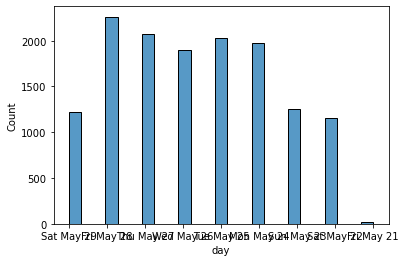

In [140]:
sns.histplot(df.day, kde=False, discrete=False)


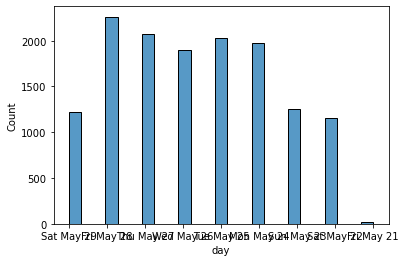

In [141]:
fig = sns.histplot(df.day, kde=False, discrete=False)


In [149]:
sns.set(rc={"figure.figsize":(10, 4)})

<AxesSubplot:xlabel='day', ylabel='Count'>

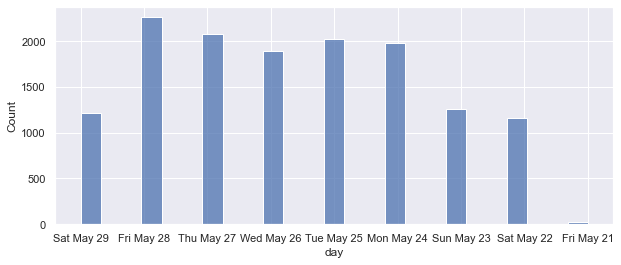

In [150]:
sns.histplot(df.day, kde=False, discrete=False)

In [151]:
# for sake of this excersies, I decided not to run an ANOVA becuase the differences in days obviously didn't vary enough to warrent confirmation. It appears that the referecnes to SCOTUS increases on workdays over weekends but is not related at all to the days (Moinday ad Thursday) that the Court releases the descisions. 
